<a href="https://colab.research.google.com/github/Julymusso/Trab_BD1_2021_Barbearia_Gourmet/blob/master/BD1_Relatorios_Empresa_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [2]:
#!pip install --user psycopg2-binary
#!pip install --user seaborn
#!pip install --user pandas

### Importando bibliotecas

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### Usando psycopg2 para configurar conexão

In [4]:
conn = psycopg2.connect(host="fanny.db.elephantsql.com", database="dcekjmnn", user="dcekjmnn", password="jlWxlcP-vQKVJap5lBFaN2XfqjHWpd1F")

# Relatórios

## Relatório 1
### Objetivo: Obter relatório que mostre o nome e o cargo de cada funcionário(a) e a quantidade de atendimentos realizados diariamente durante o mês de Dezembro.
Código para obtenção do resultado:

In [ ]:
funcionario = pd.read_sql_query("""select ordem_servico.fk_pessoa_id_pessoa, pessoa.nome, pessoa.sobrenome, funcionario.cargo, ordem_servico.data, count(pessoa.nome) as quantidade_atendimento_mes
from pessoa
join funcionario on (funcionario.fk_pessoa_id_pessoa = pessoa.id_pessoa)
join ordem_servico on (ordem_servico.data >= '2021-12-01' and ordem_servico.data <= '2021-12-31')
where pessoa.id_pessoa = funcionario.fk_pessoa_id_pessoa
group by ordem_servico.fk_pessoa_id_pessoa, pessoa.nome, pessoa.sobrenome, funcionario.cargo, ordem_servico.data
order by ordem_servico.data
""", conn)
funcionario

,fk_pessoa_id_pessoa,nome,sobrenome,cargo,data,quantidade_atendimento_mes
0,141,Arthur,Daniel Oliveira,Depilador,2021-12-01,1
1,141,Benjamin,Pedro Victor Caldeira,Depilador,2021-12-01,1
2,141,Danilo,Márcio Carlos Eduardo Alves,Manicure,2021-12-01,1
3,141,Enrico,Edson Marcelo Costa,Manicure,2021-12-01,1
4,141,Enzo,Roberto Danilo Gomes,Cabeleleiro,2021-12-01,1
...,...,...,...,...,...,...
1845,383,Erick,Thomas Melo,Cabeleleiro,2021-12-31,1
1846,383,Felipe,Thomas Luís Ramos,Cabeleleiro,2021-12-31,1
1847,383,Giovanni,Roberto Bento Sales,Cabeleleiro,2021-12-31,1
1848,383,Henrique,Hugo Ian da Mota,Cabeleleiro,2021-12-31,1


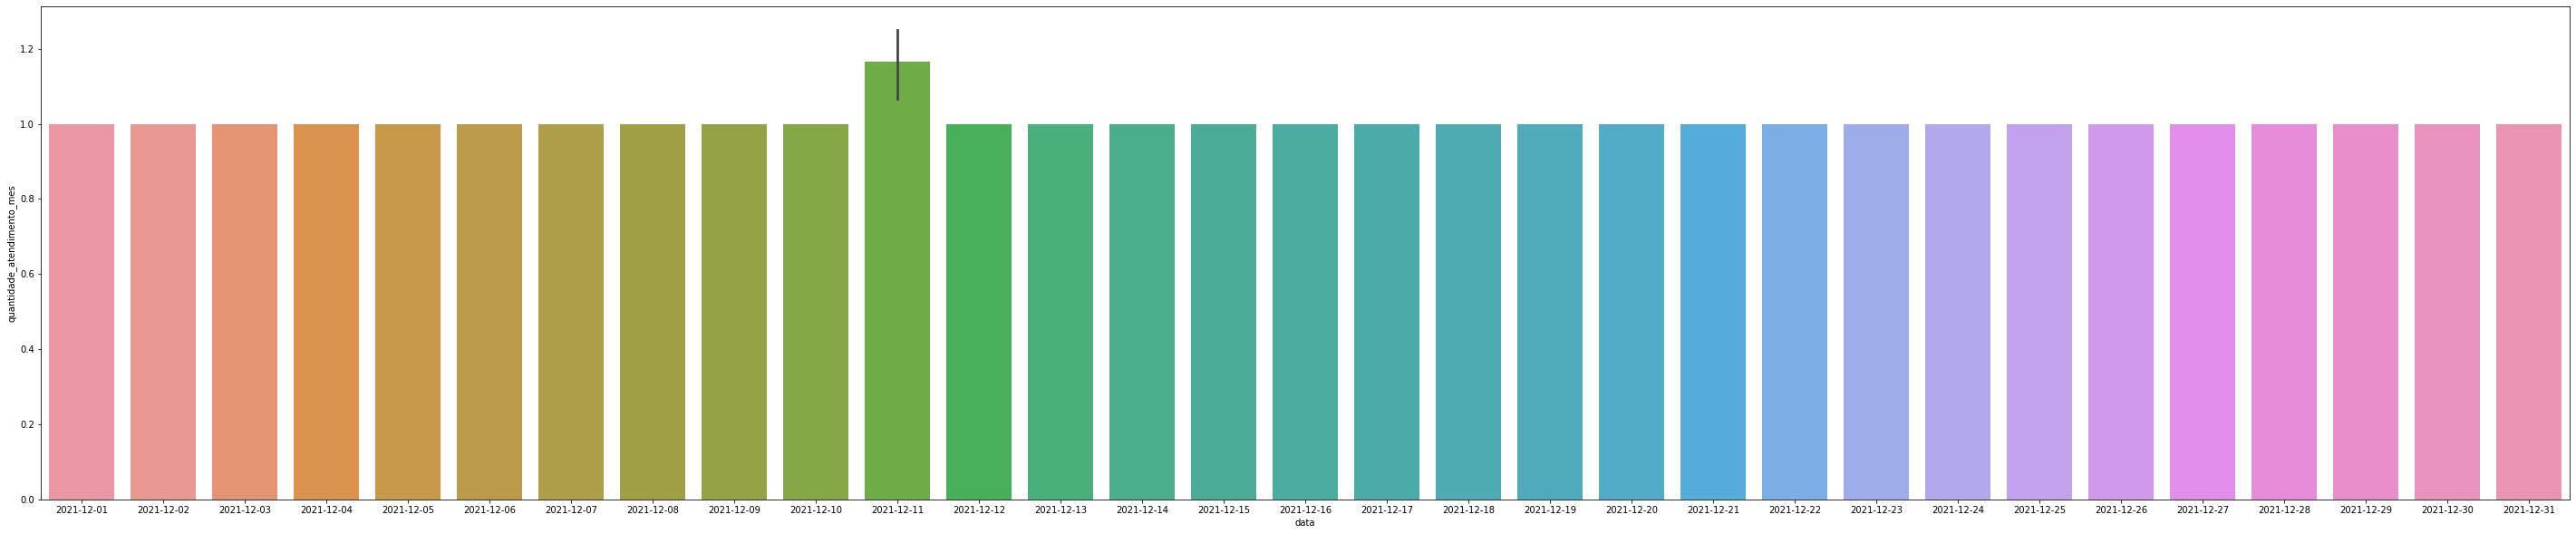

In [ ]:
plt.figure(figsize=(50,10));
sns.barplot(x='data', y='quantidade_atendimento_mes',data=funcionario);

# ==========================================================================================
## Relatório 2
### Objetivo: Obter relatório que mostre o nome de cada serviço e a quantas vezes eles foram solicitados no último trimestre do ano de 2021.
Código para obtenção do resultado:

In [69]:
res = pd.read_sql_query("""select servico.tipo_servico, ordem_servico.data, count(servico.tipo_servico) as qtd_solicitacoes_mes
from servico as servico
join ordem_servico on (ordem_servico.data is not null)
where ordem_servico.data >= '2021-09-01' and ordem_servico.data <= '2021-12-31'
group by servico.tipo_servico, ordem_servico.data
order by ordem_servico.data 
 """, conn)
res

,tipo_servico,data,qtd_solicitacoes_mes
0,Pé e Mão,2021-09-01,1
1,Alisamento,2021-09-01,1
2,Corte de cabelo 6,2021-09-01,1
3,Depilação 4,2021-09-01,1
4,Depilação 2,2021-09-01,1
...,...,...,...
1703,Depilação 3,2021-12-31,4
1704,Depilação 4,2021-12-31,4
1705,Pé,2021-12-31,4
1706,Corte de cabelo 1,2021-12-31,4


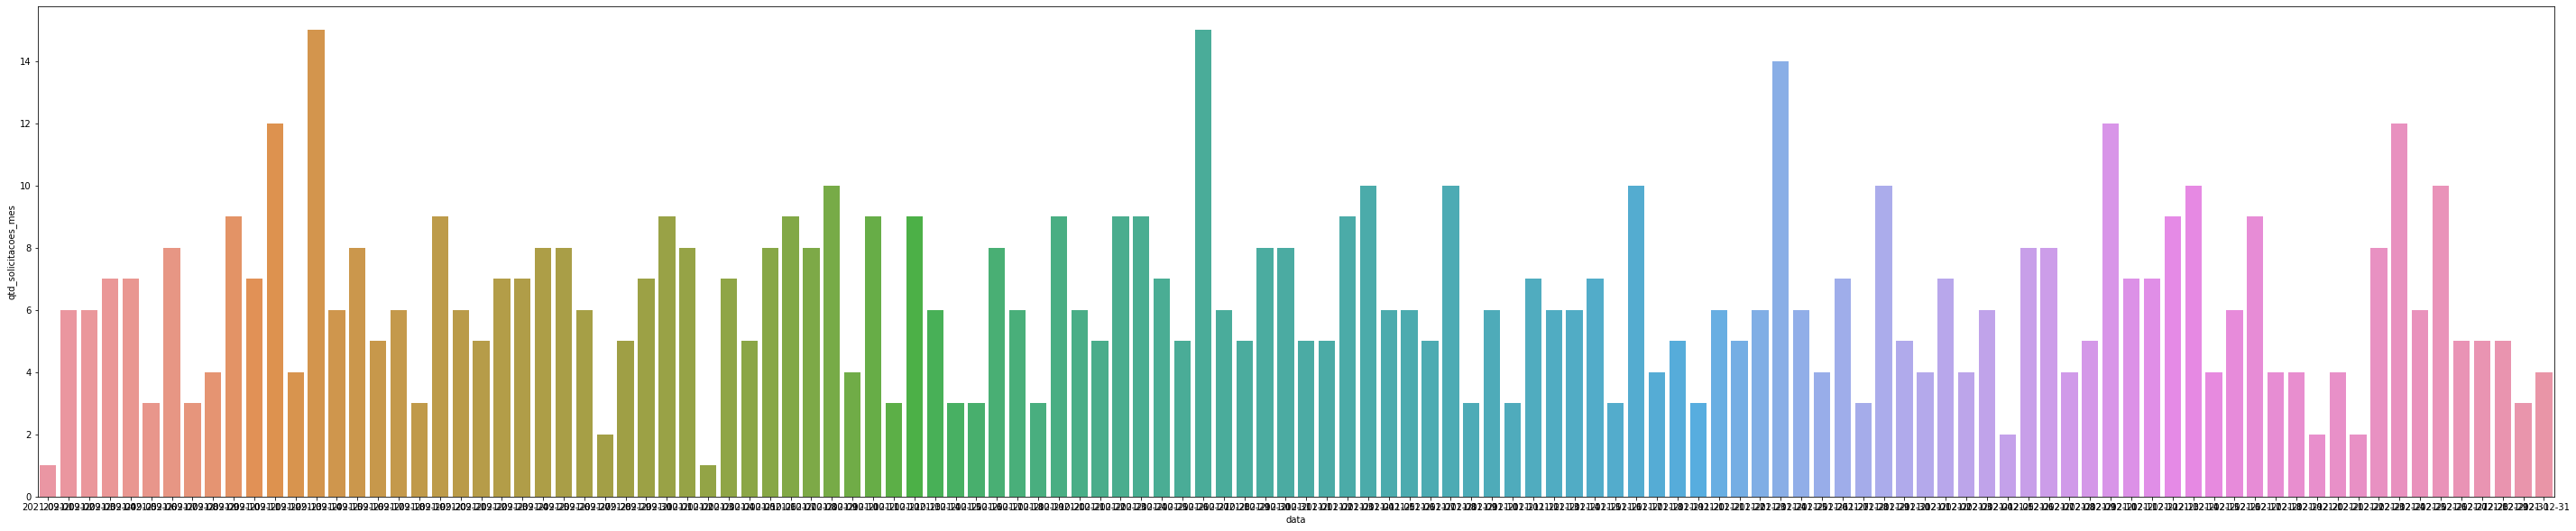

In [70]:
plt.figure(figsize=(50,10));
sns.barplot(x='data', y='qtd_solicitacoes_mes', data=res);


# ============================================================
## Relatório 3
### Objetivo: Obter relatorio que mostre o nome do funcionário, cpf, cargo e a soma do valor dos serviços realizados na empresa, ou seja, mostra o funcionário mais lucrativo.
Código para obtenção do resultado:

In [71]:
res = pd.read_sql_query("""select pessoa.nome as funcionario, pessoa.cpf, funcionario.cargo, sum(servico.valor) as valor_total
from pessoa as pessoa
join servico on (servico.id_servico = pessoa.id_pessoa)
join ordem_servico on (ordem_servico.fk_pessoa_id_pessoa = servico.id_servico)
join funcionario on (funcionario.cargo is not null)
where ordem_servico.data >= '2021-09-01' and ordem_servico.data <= '2021-12-31' 
group by pessoa.nome, pessoa.cpf, funcionario.cargo
order by valor_total desc
""",conn)
res

,funcionario,cpf,cargo,valor_total
0,Vinicius,500.944.857-20,Cabeleleiro,1620.0
1,Vinicius,500.944.857-20,Depilador,540.0
2,Vinicius,500.944.857-20,Manicure,540.0
3,Vicente,485.717.007-88,Cabeleleiro,480.0
4,Rafael,830.164.537-70,Cabeleleiro,300.0
5,Vicente,485.717.007-88,Manicure,160.0
6,Vicente,485.717.007-88,Depilador,160.0
7,Kevin,179.019.247-13,Cabeleleiro,150.0
8,Rafael,830.164.537-70,Depilador,100.0
9,Rafael,830.164.537-70,Manicure,100.0


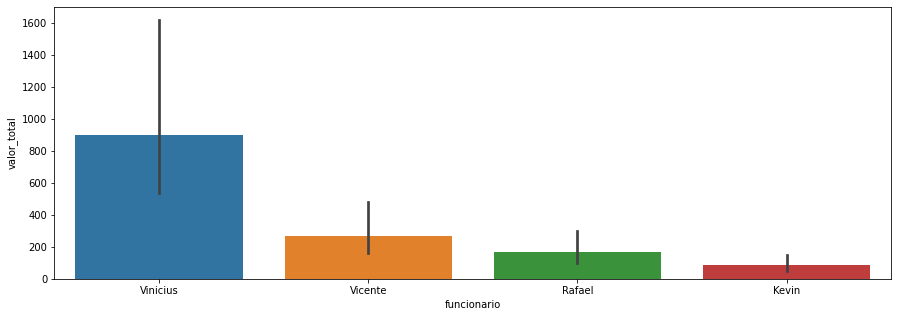

In [72]:
plt.figure(figsize=(15,5));
sns.barplot(x='funcionario',y='valor_total',data=res,);

# ============================================================
## Relatório 4
### Objetivo: Obter Relatório que mostre as informações de servico mais solicitado, lucro total dos servicos e o valor total no mês de Dezembro.

Código para obtenção do resultado:

In [95]:
res = pd.read_sql_query("""select servico.tipo_servico, ordem_servico.data, count(servico.tipo_servico) as total_solicitacoes_dia
from servico as servico
join ordem_servico on (ordem_servico.id_os is not null)
where ordem_servico.data >= '2021-12-01' and ordem_servico.data <= '2021-12-31'
group by servico.tipo_servico, ordem_servico.data
order by ordem_servico.data 
""", conn)
res

,tipo_servico,data,total_solicitacoes_dia
0,Corte de cabelo 5,2021-12-01,4
1,Depilação 3,2021-12-01,4
2,Depilação 1,2021-12-01,4
3,Mão,2021-12-01,4
4,Depilação 4,2021-12-01,4
...,...,...,...
429,Depilação 1,2021-12-31,4
430,Corte de cabelo 1,2021-12-31,4
431,Depilação 3,2021-12-31,4
432,Corte de cabelo 2,2021-12-31,4


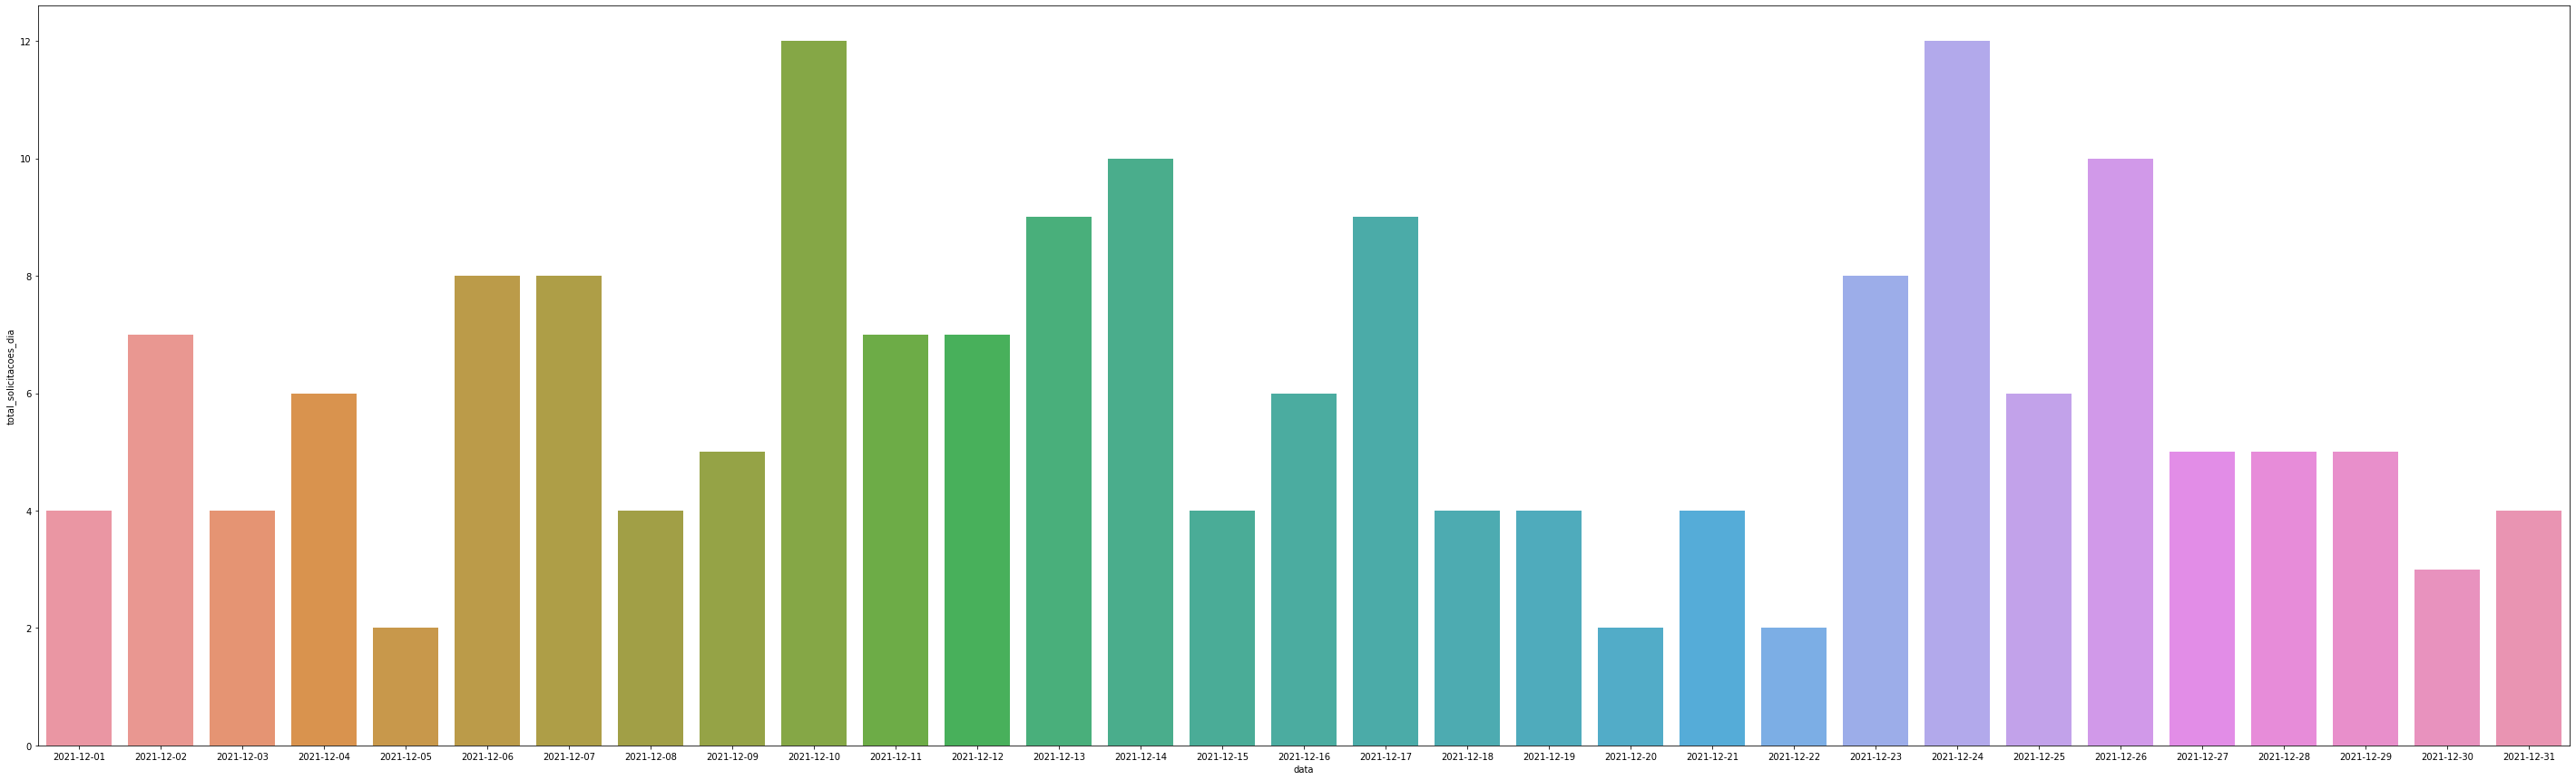

In [98]:
plt.figure(figsize=(50,15));
sns.barplot(x = 'data', y = 'total_solicitacoes_dia', data=res,);

# ============================================================
## Relatório 5
### Objetivo: Qual pessoa mais gastou na barbearia e qual foi o serviço.
Código para obtenção do resultado:

In [124]:
res = pd.read_sql_query(""" SELECT pessoa.nome, pessoa.sobrenome, servico.valor, count(pessoa.id_pessoa), sum(servico.valor) as total_gasto
from pessoa as pessoa
inner join ordem_servico on (ordem_servico.fk_pessoa_id_pessoa=pessoa.id_pessoa)
inner join ordem_servico_servico on (ordem_servico_servico.fk_ordem_servico_id_os=ordem_servico.id_os)
inner join servico on (servico.id_servico=ordem_servico_servico.fk_servico_id_servico)
group by pessoa.nome, pessoa.sobrenome, servico.valor
order by total_gasto desc
""", conn)
res

,nome,sobrenome,valor,count,total_gasto
0,Thomas,Fernando Araújo,90.0,4,360.0
1,Samuel,Danilo Guilherme Assis,90.0,4,360.0
2,Renata,Elaine Dias,90.0,4,360.0
3,Silvana,Maria Carla Ramos,90.0,4,360.0
4,Ryan,Guilherme Márcio Cavalcanti,90.0,4,360.0
...,...,...,...,...,...
1912,Murilo,Carlos Nelson Alves,15.0,1,15.0
1913,Rosa,Brenda Barros,15.0,1,15.0
1914,Fernando,Lucas Geraldo Alves,15.0,1,15.0
1915,Miguel,Anthony Rodrigues,15.0,1,15.0


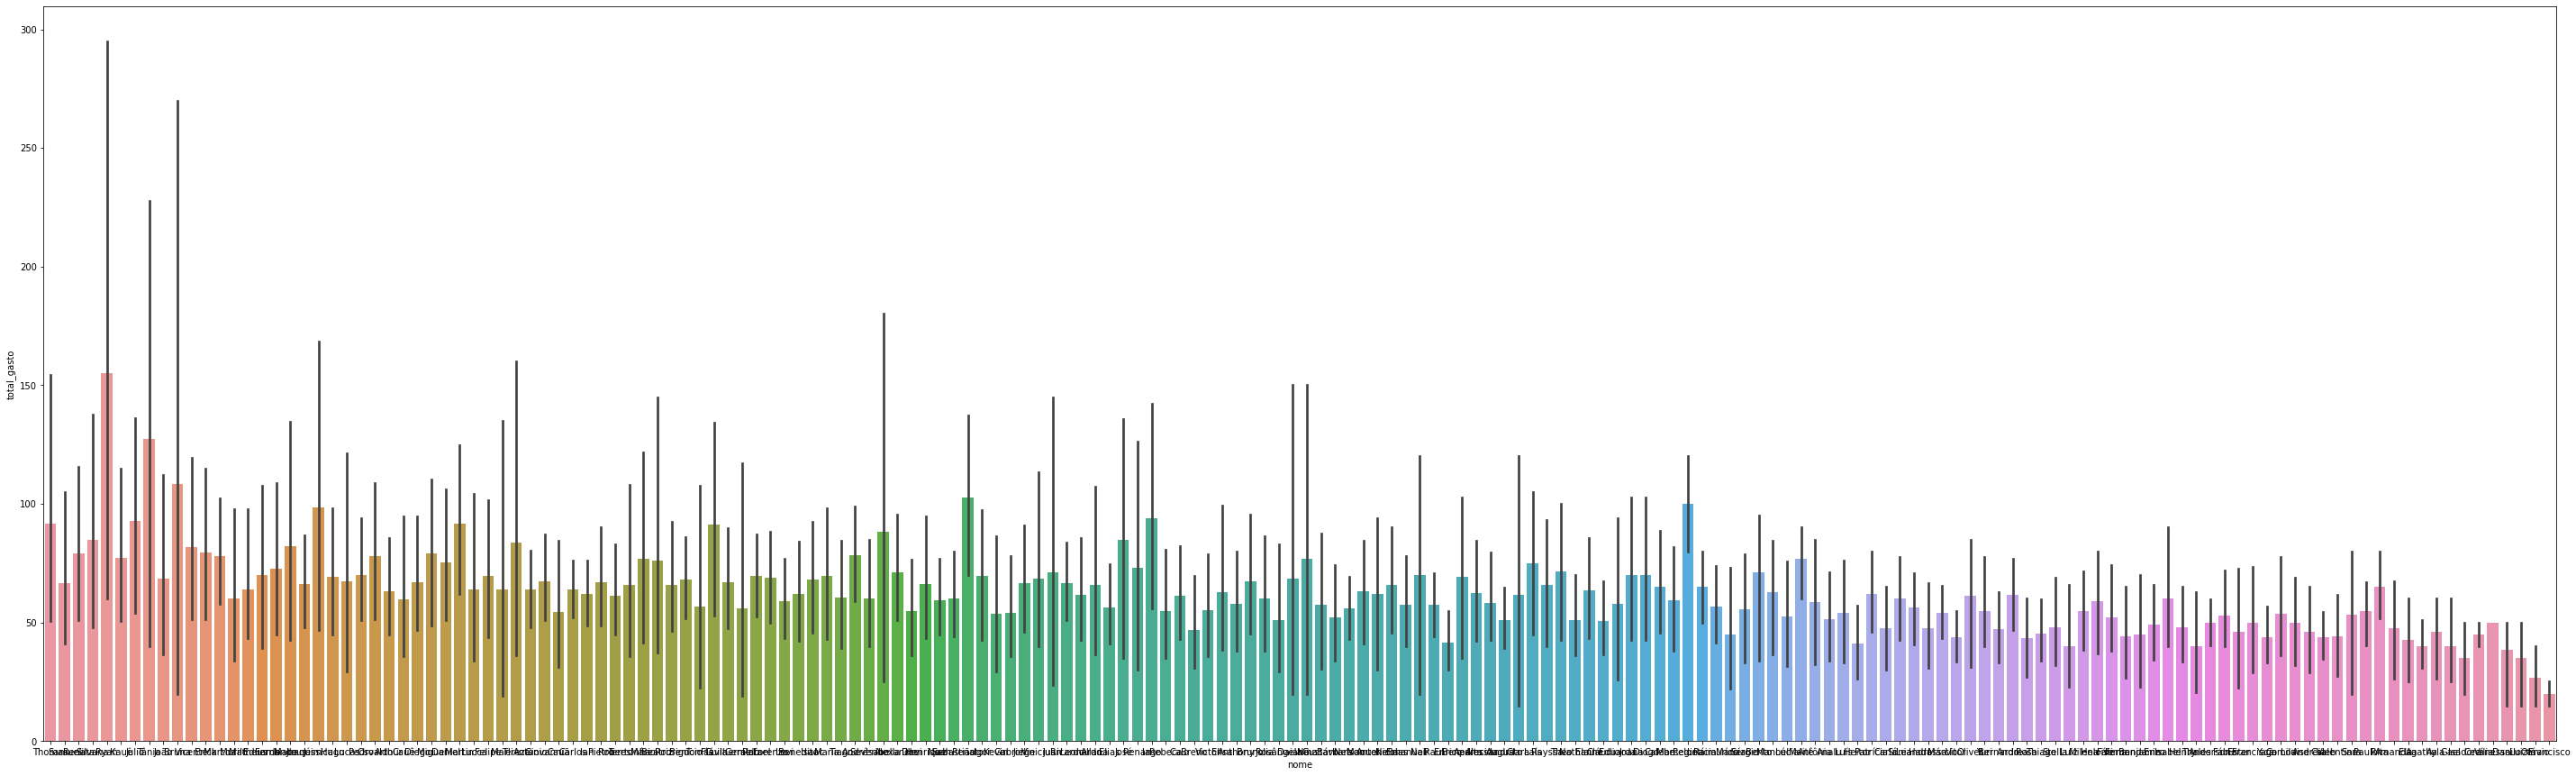

In [125]:
plt.figure(figsize=(50,15));
sns.barplot(x='nome',y='total_gasto', data=res);